## Sentences vectorisation
Text of memes are vectorised using pretrained Universal sentence encoding <cite data-cite="cer2018">(Cer et al., 2018)</cite>. The dataset of training is not specified nor open sourced by the authors. 

In [1]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from src.utils.file_utils import load_pickle_file

## Visualisation of labels distribution

In [8]:
df_train = pd.read_csv("data/train_text_cleaned_final.csv", usecols=["image_name", "Humour", "Sarcasm", "Offense", "Overall_sentiment"])

In [9]:
df_train["Overall_sentiment"] = pd.Categorical(df_train["Overall_sentiment"], categories=["negative", "neutral", "positive"], ordered=True)
df_train["Humour"] = pd.Categorical(df_train["Humour"], categories=["not_funny", "funny", "very_funny", "hilarious"], ordered=True)
df_train["Sarcasm"] = pd.Categorical(df_train["Sarcasm"], categories=["not_sarcastic", "general", "twisted_meaning", "very_twisted"], ordered=True)
df_train["Offense"] = pd.Categorical(df_train["Offense"], categories=["not_offensive", "slight", "very_offensive", "hateful_offensive"], ordered=True)

In [10]:
df_dev = pd.read_csv("data/dev_text_cleaned_final.csv", usecols=["image_name", "Humour", "Sarcasm", "Offense", "Overall_sentiment"])

In [11]:
df_dev["Overall_sentiment"] = pd.Categorical(df_dev["Overall_sentiment"], categories=["negative", "neutral", "positive"], ordered=True)
df_dev["Humour"] = pd.Categorical(df_dev["Humour"], categories=["not_funny", "funny", "very_funny", "hilarious"], ordered=True)
df_dev["Sarcasm"] = pd.Categorical(df_dev["Sarcasm"], categories=["not_sarcastic", "general", "twisted_meaning", "very_twisted"], ordered=True)
df_dev["Offense"] = pd.Categorical(df_dev["Offense"], categories=["not_offensive", "slight", "very_offensive", "hateful_offensive"], ordered=True)

### Image

In [12]:
def load_img_embeddings(source_file):
    img_embeddings = load_pickle_file(source_file)
    img_embed = list(img_embeddings.values())
    img_embed = np.array(img_embed)
    img_embed = img_embed.reshape((img_embed.shape[0],img_embed.shape[2]))
    return img_embed

In [13]:
img_embed = load_img_embeddings("data/features/xception.pkl.train")

In [14]:
img_embed_dev = load_img_embeddings("data/features/xception.pkl.dev")

In [15]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
img_tsne = tsne.fit_transform(img_embed)

In [16]:
img_tsne.shape

(6999, 2)

In [17]:
df_train["tsne_img_x"] = img_tsne[:,0]
df_train["tsne_img_y"] = img_tsne[:,1]

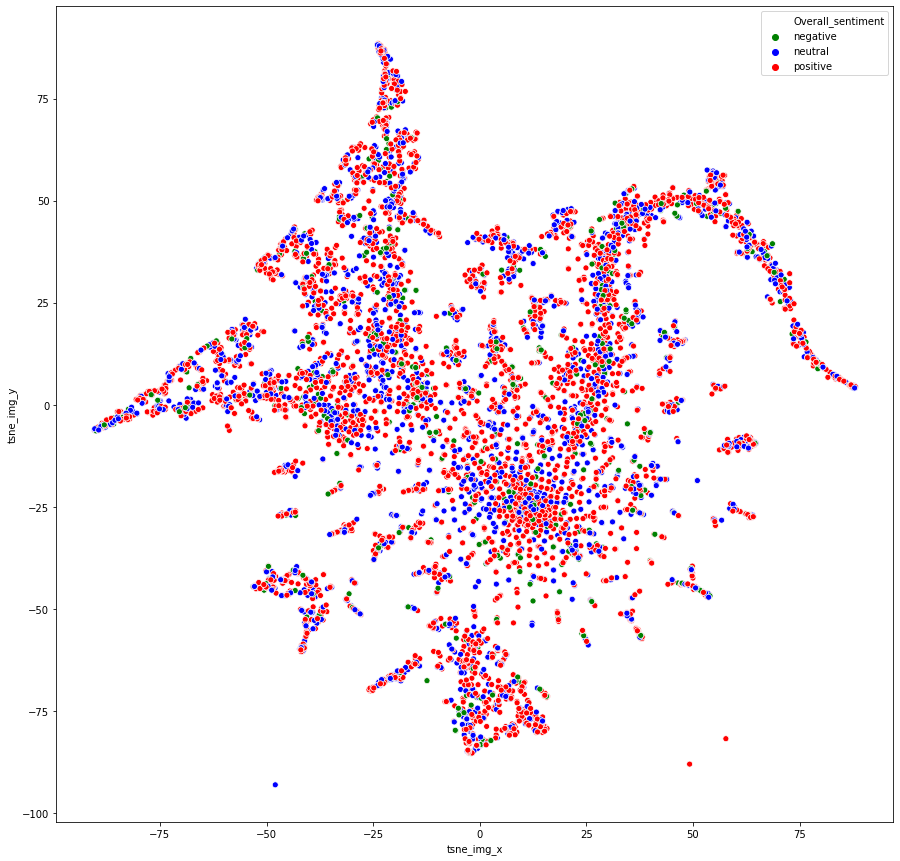

In [18]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Overall_sentiment",
    palette=["green", "blue", "red"],
    data=df_train,
    legend="full"
)

In [19]:
df_train["Sarcasm"].unique()

[general, not_sarcastic, twisted_meaning, very_twisted]
Categories (4, object): [not_sarcastic < general < twisted_meaning < very_twisted]

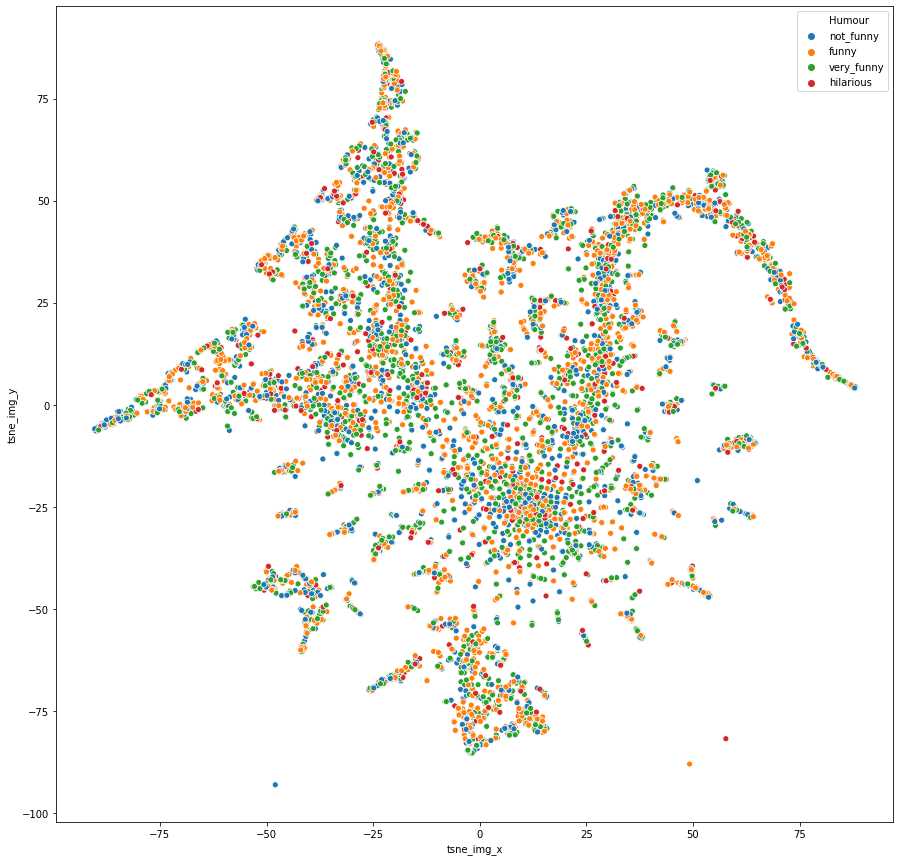

In [20]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

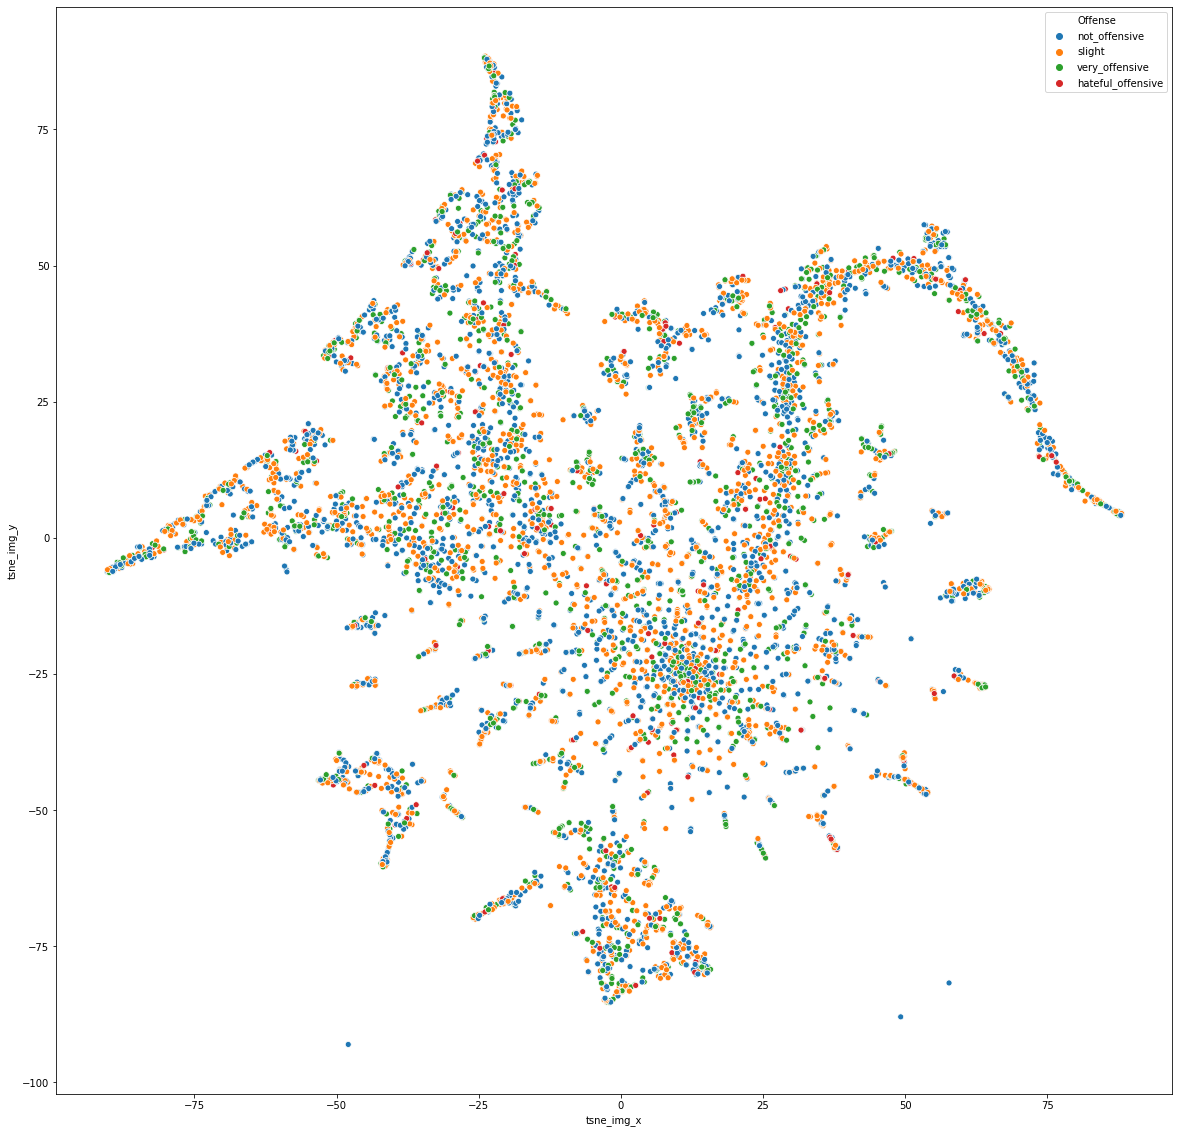

In [21]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

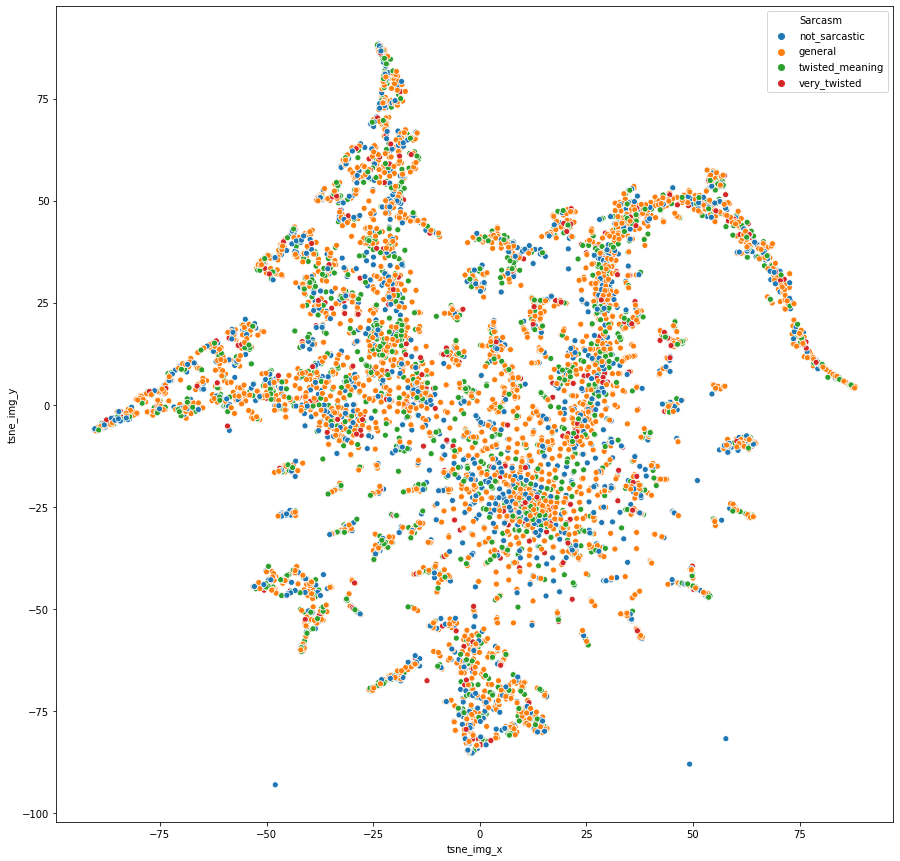

In [22]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_img_x", y="tsne_img_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)

### Text

In [23]:
def load_sent_embeddings(source_file, df):
    sent_embeddings = load_pickle_file(source_file)
    
    # For an unknown reason mapping numpy conversion to all tensors with list.map or during pickle save
    # remove some of the entries so I use loop instead to prevent entries removal
    img_ids = df["image_name"]
    sent_embed = []
    for i, img_id in enumerate(img_ids):
        e = sent_embeddings[img_ids[i]].numpy()
        sent_embed.append(e)
    sent_embed = np.array(sent_embed)
    return sent_embed

In [24]:
sent_embed = load_sent_embeddings("data/features/use.pkl.train", df_train)

In [25]:
sent_embed_dev = load_sent_embeddings("data/features/use.pkl.dev", df_dev)

In [26]:
sent_embed.shape

(6999, 512)

In [27]:
sent_embed_dev.shape

(1000, 512)

In [28]:
tsne = TSNE(n_components=2, init='pca', random_state=0)
sent_tsne = tsne.fit_transform(sent_embed)

In [29]:
df_train["tsne_sent_x"] = sent_tsne[:,0]
df_train["tsne_sent_y"] = sent_tsne[:,1]

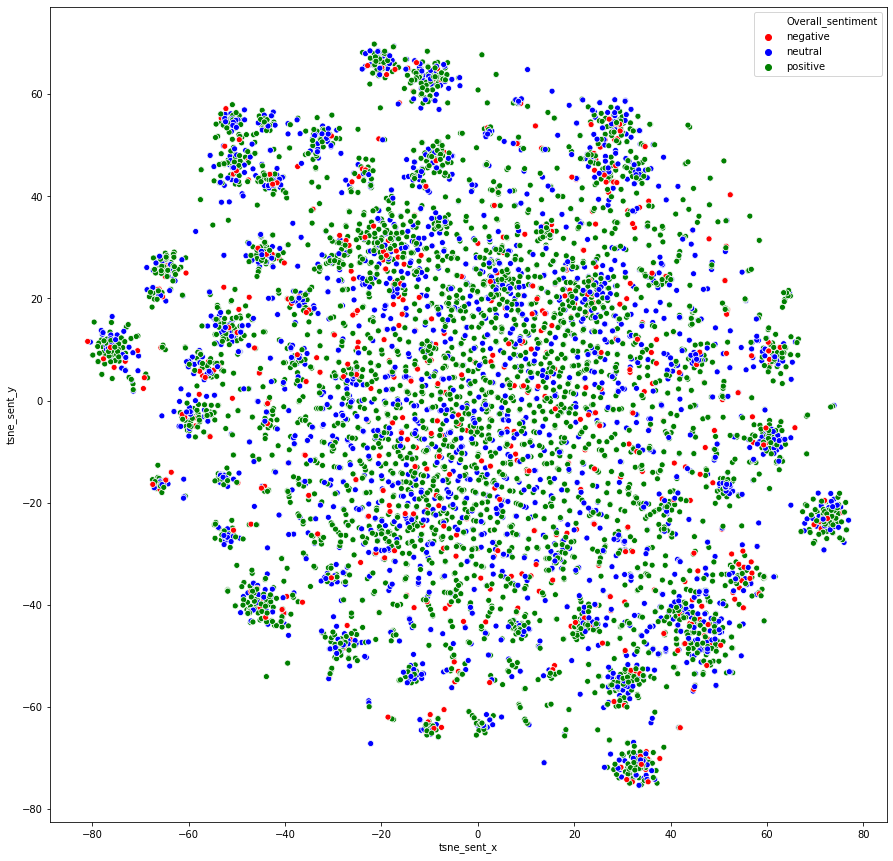

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Overall_sentiment",
    palette=["red", "blue", "green"],
    data=df_train,
    legend="full"
)

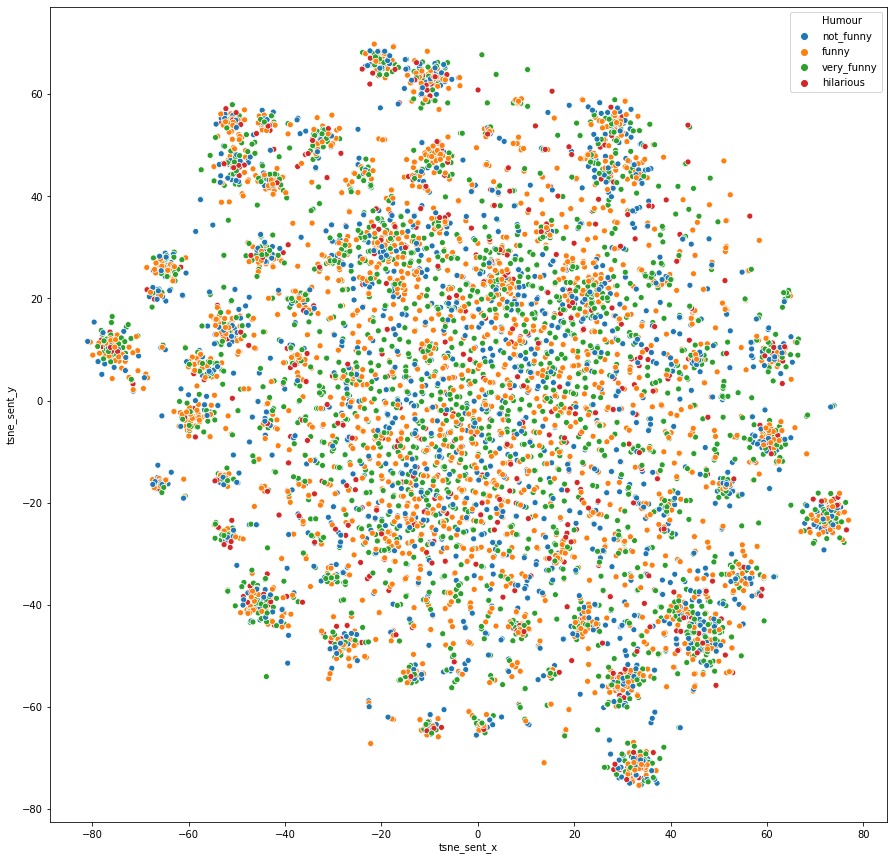

In [31]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Humour",
    data=df_train,
    legend="full",
    hue_order=["not_funny", "funny", "very_funny", "hilarious"]
)

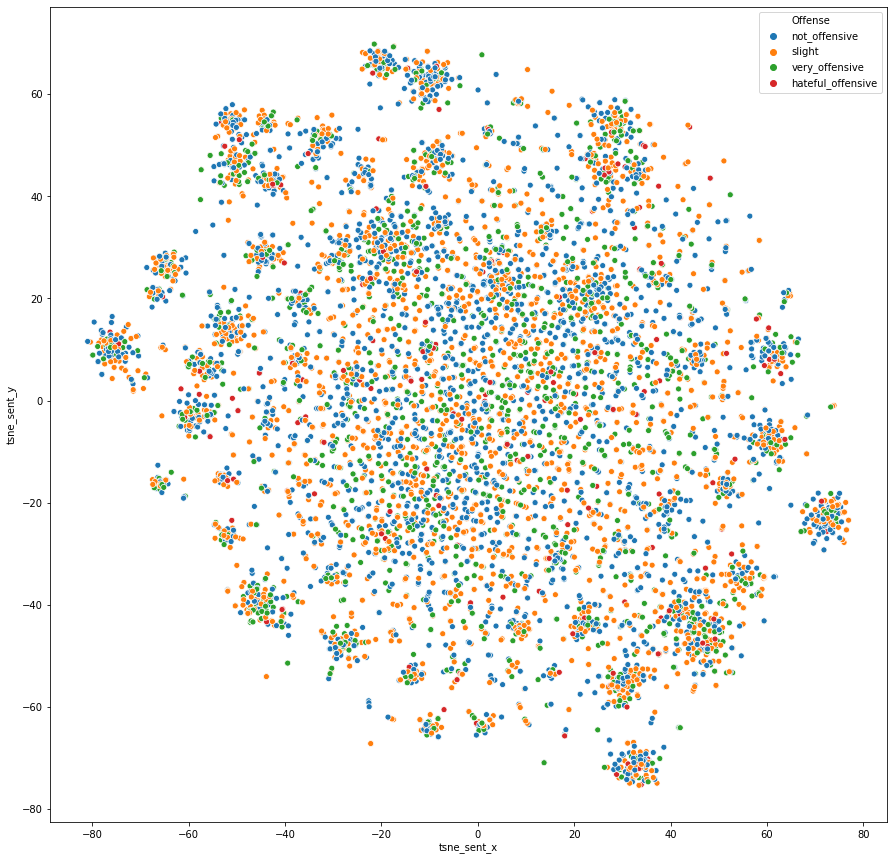

In [32]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Offense",
    data=df_train,
    legend="full",
    hue_order=["not_offensive", "slight", "very_offensive", "hateful_offensive"]
)

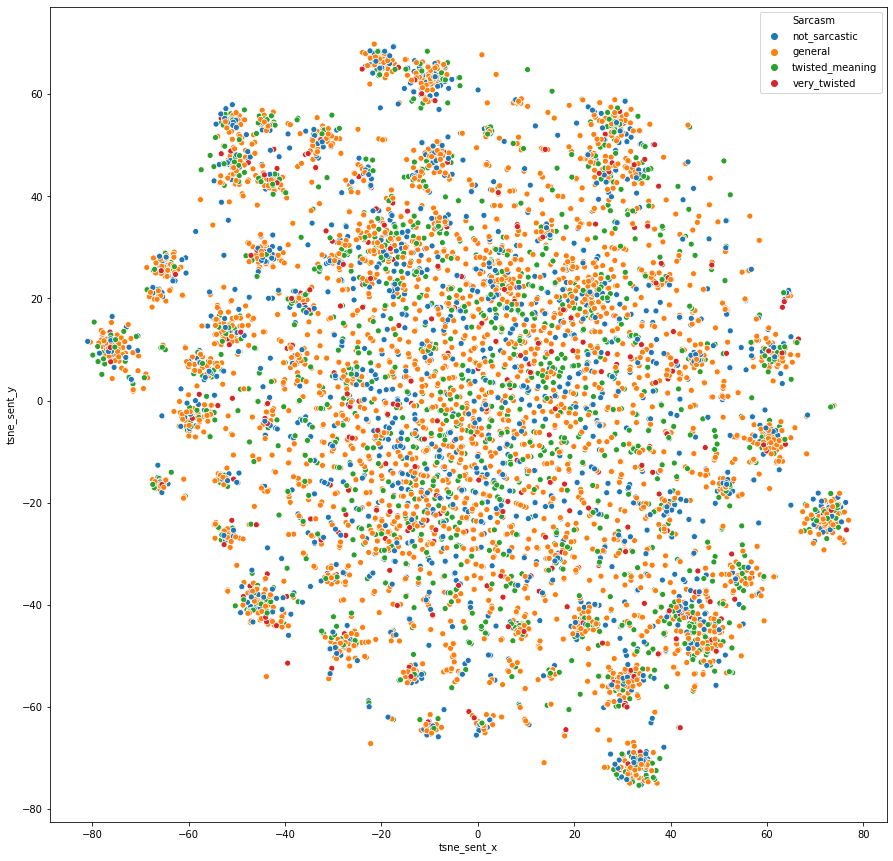

In [33]:
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="tsne_sent_x", y="tsne_sent_y",
    hue="Sarcasm",
    data=df_train,
    legend="full",
    hue_order=["not_sarcastic", "general",  "twisted_meaning", "very_twisted"]
)
